In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<Axes: >

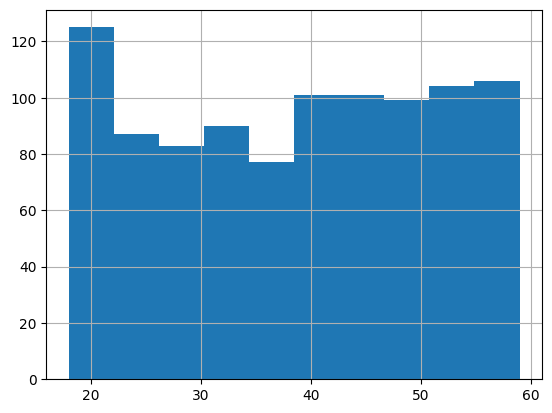

In [4]:
df.Age.hist()

Text(0, 0.5, '')

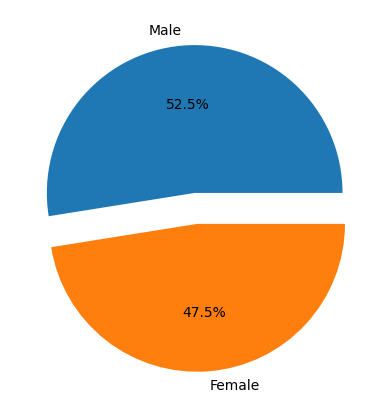

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df.Gender.value_counts().plot.pie(explode=[.01,.2], autopct='%.1f%%')
plt.ylabel('')

<Axes: >

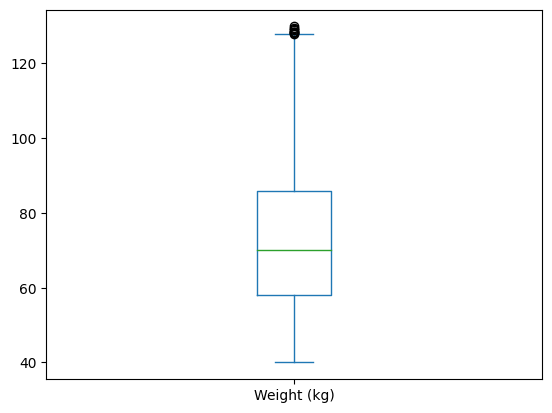

In [22]:
df['Weight (kg)'].plot.box()

<Axes: xlabel='Gender', ylabel='Weight (kg)'>

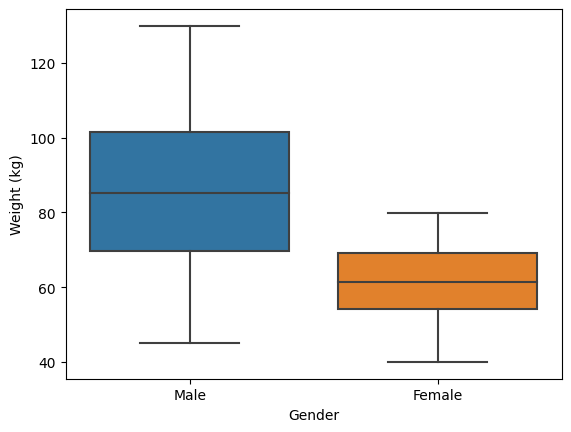

In [23]:
sns.boxplot(data=df, x='Gender',y='Weight (kg)')

<Axes: xlabel='Gender', ylabel='Height (m)'>

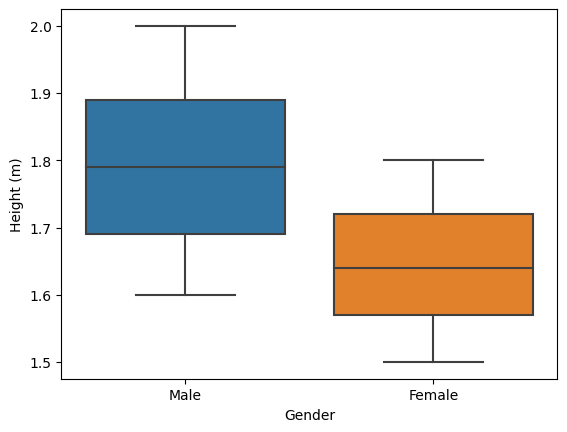

In [24]:
sns.boxplot(data=df, x='Gender',y='Height (m)')

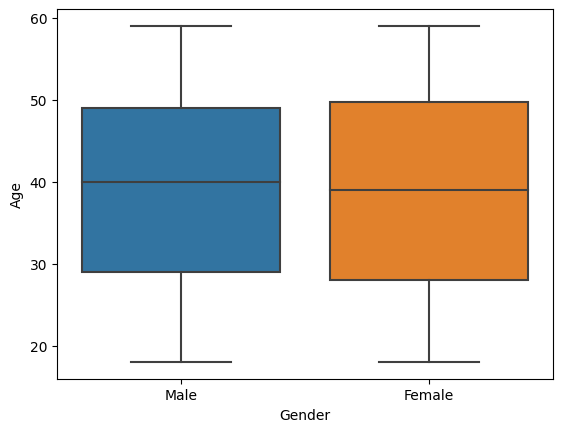

<Figure size 640x480 with 0 Axes>

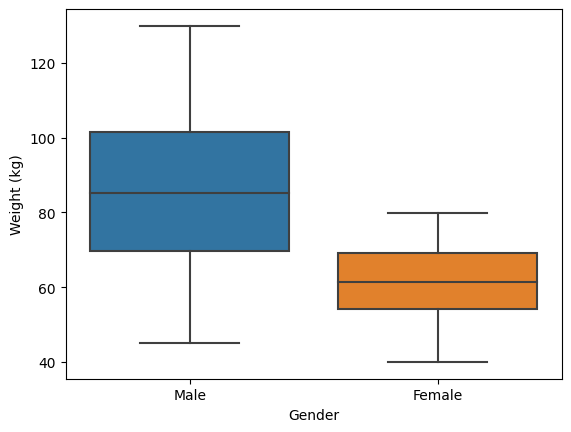

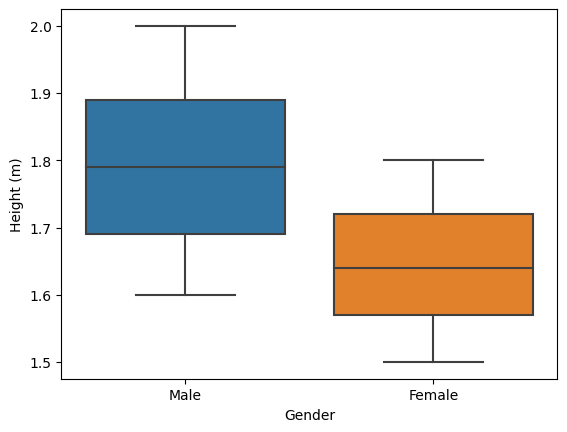

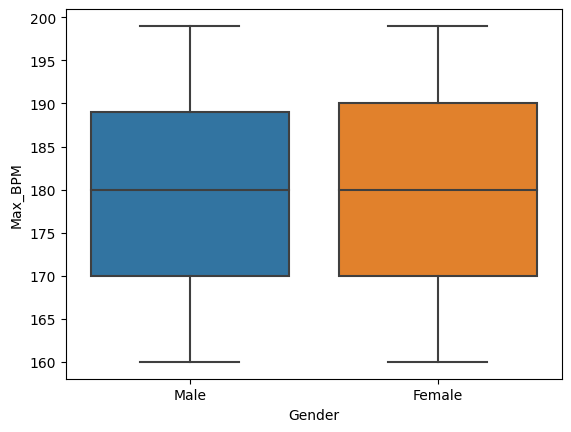

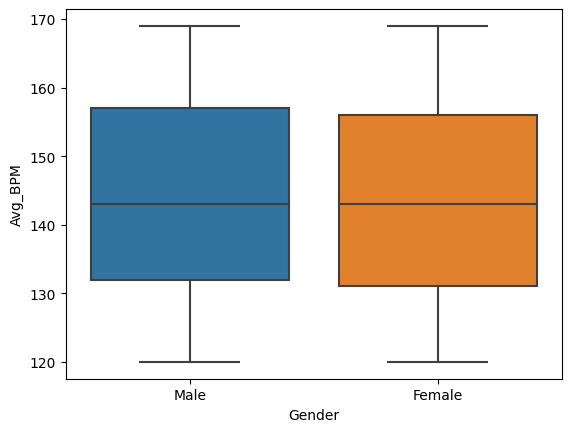

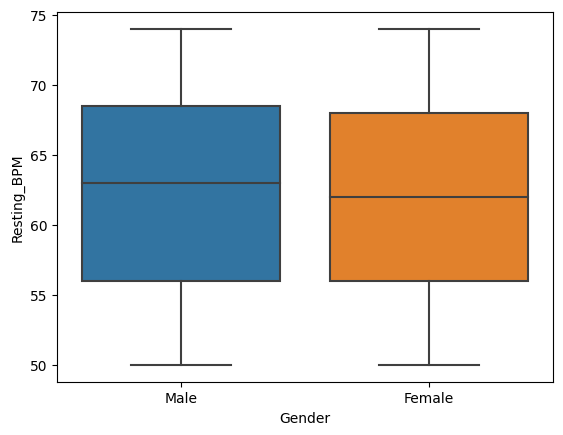

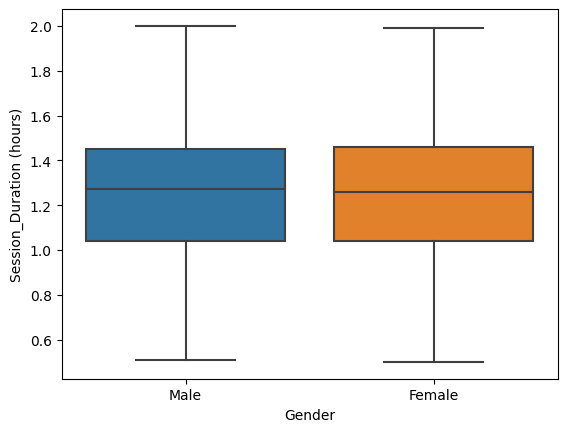

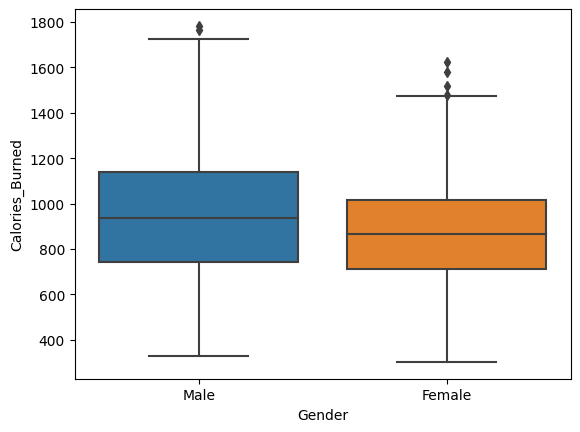

<Figure size 640x480 with 0 Axes>

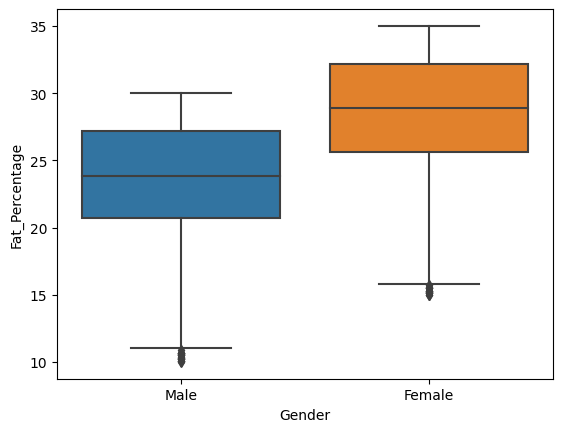

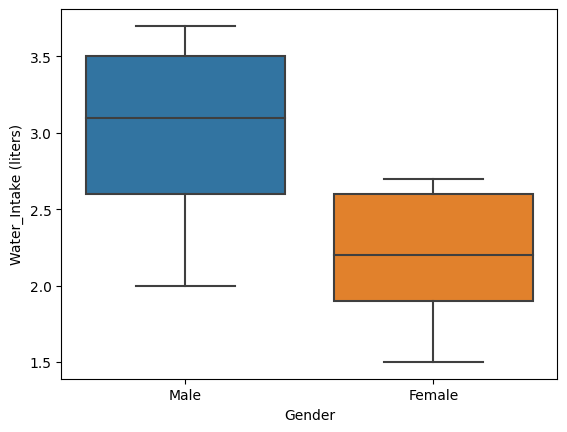

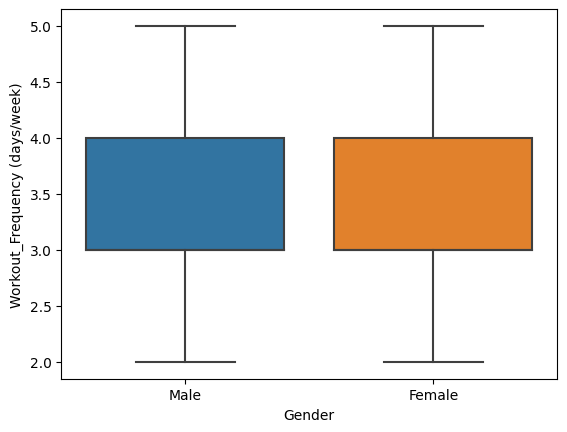

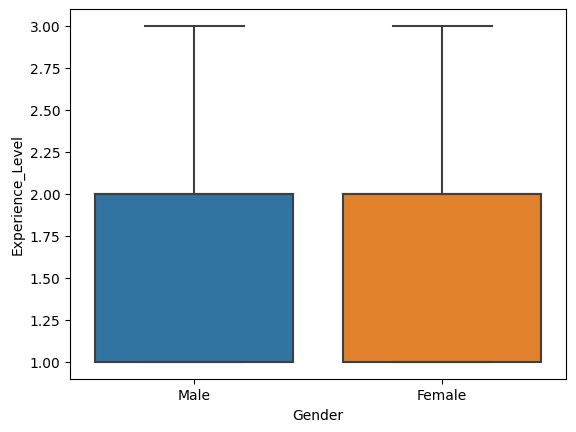

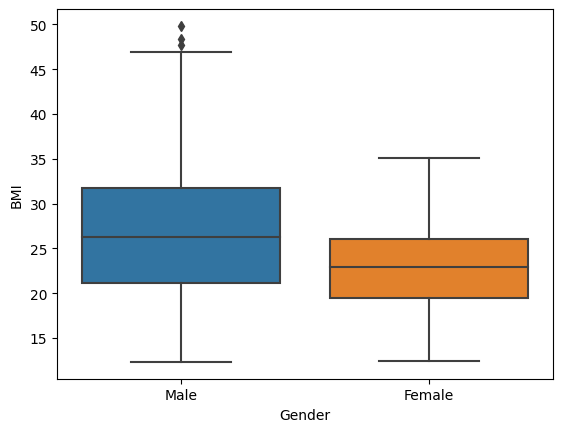

In [28]:
number = 0
for i in df.columns.tolist():
    plt.figure(number)
    if i in numerical.columns.tolist():
     sns.boxplot(data=df,x='Gender',y=i)
    number+=1

In [30]:
from scipy.stats import ttest_ind

male_weight = df.loc[df.Gender=='Male','Weight (kg)']
female_weight = df.loc[df.Gender=='Female','Weight (kg)']

tstat, pval = ttest_ind(male_weight, female_weight)


In [32]:
if pval < 0.05:
    print('There is enough evidence to reject the null hypothesis.\nGender has an influence on Weight.')

There is enough evidence to reject the null hypothesis.
Gender has an influence on Weight.


In [35]:
male_height = df.loc[df.Gender=='Male','Height (m)']
female_height = df.loc[df.Gender=='Female','Height (m)']

tstat, pval = ttest_ind(male_height, female_height)

if pval < 0.05:
    print('There is enough evidence to reject the null hypothesis.\nGender has an influence on Height.')

There is enough evidence to reject the null hypothesis.
Gender has an influence on Height.


#### We have found two features that we can use to find possible clusters;
#### Lets search for more.

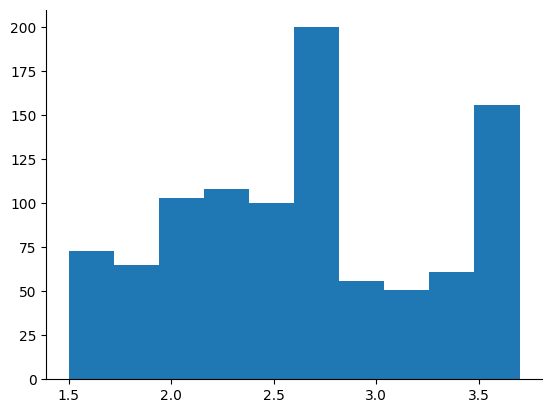

In [43]:
fig, ax = plt.subplots()
df['Water_Intake (liters)'].hist(grid=False)
ax.spines[['top','right']].set_visible(False)

In [45]:
male_water_intake = df.loc[df.Gender=='Male','Water_Intake (liters)']
female_water_intake = df.loc[df.Gender=='Female','Water_Intake (liters)']

tstat, pval = ttest_ind(male_water_intake, female_water_intake)
if pval < 0.05:
    print('There is enough evidence to reject the null hypothesis;\nGender has an influence on "Water Intake"')

There is enough evidence to reject the null hypothesis;
Gender has an influence on "Water Intake"


### We have found three features to segment the gym members.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PCA Component 2')

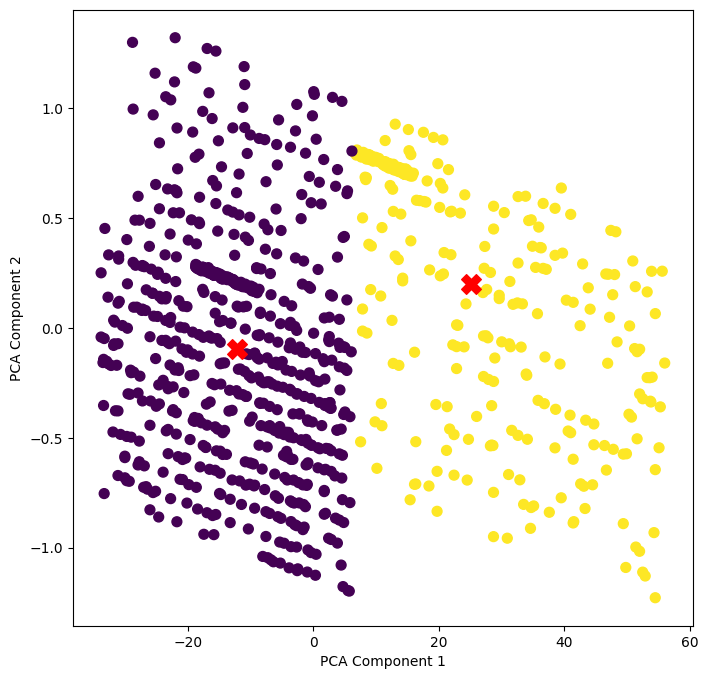

In [50]:
features = df[['Water_Intake (liters)','Height (m)','Weight (kg)']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
centers= kmeans.cluster_centers_

plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0], X_pca[:,1],s=50, c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], marker='X',s=200, color='red')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

## TUNING FOR THE BEST NUMBER OF CLUSTERS

In [54]:
inertia = []
sil = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(features)
    labels = kmeans.fit_predict(features)
    sil.append(silhouette_score(features, labels))
    inertia.append(kmeans.inertia_)
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

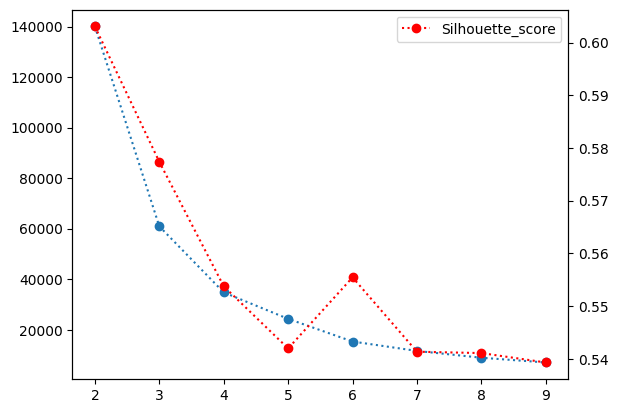

In [57]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.figure(1)
ax.plot(range(2,10), inertia, marker='o', linestyle=':', label='inertia')
ax2.plot(range(2,10), sil, marker='o', linestyle=':', color='r', label='Silhouette_score')

plt.legend()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


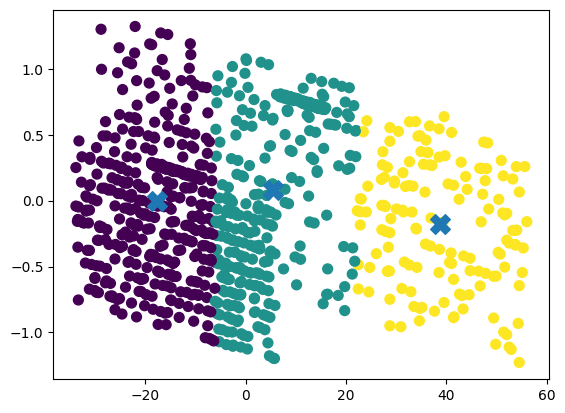

In [59]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
centers = kmeans.cluster_centers_
plt.scatter(X_pca[:,0],X_pca[:,1], s=50, c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)

In [61]:
df['segment'] = pd.Series(kmeans.labels_)

In [62]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,segment
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,1
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,1
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0


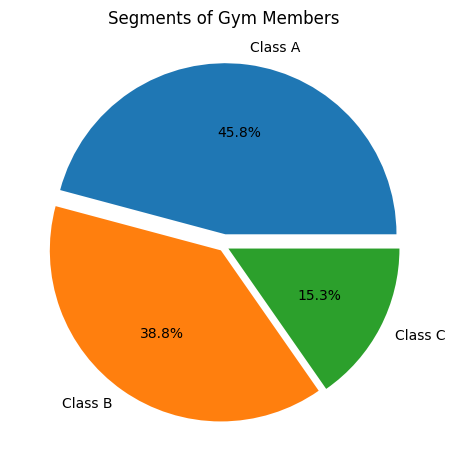

In [73]:
df.segment.value_counts().plot.pie(autopct='%.1f%%', explode=[.07,.03,.03], labels=['Class A','Class B','Class C'])
plt.ylabel('')
plt.title('Segments of Gym Members')
plt.tight_layout()

In [75]:
df.segment = df.segment.replace({0:'Class A',1:'Class B',2:'Class C'})

In [88]:
pd.pivot_table(data=df, index='segment',columns='Gender',values='Calories_Burned', margins=True).style.background_gradient(cmap='viridis')

Gender,Female,Male,All
segment,,,
Class A,888.127273,841.172414,875.914798
Class B,797.553030,1049.967480,961.822751
Class C,nan,850.664430,850.664430
All,862.248918,944.455969,905.422405


In [89]:
pd.pivot_table(data=df, index='segment',columns='Gender',values='Weight (kg)', margins=True).style.background_gradient(cmap='viridis')

Gender,Female,Male,All
segment,,,
Class A,56.034848,56.543103,56.167040
Class B,73.202273,82.710569,79.390212
Class C,nan,112.755705,112.755705
All,60.939827,85.531115,73.854676


In [90]:
pd.pivot_table(data=df, index='segment',columns='Gender',values='Height (m)', margins=True).style.background_gradient(cmap='viridis')

Gender,Female,Male,All
segment,,,
Class A,1.641636,1.773707,1.675987
Class B,1.650758,1.799268,1.747407
Class C,nan,1.799060,1.799060
All,1.644242,1.793405,1.722580


In [91]:
pd.pivot_table(data=df, index='segment',columns='Gender',values='Water_Intake (liters)', margins=True).style.background_gradient(cmap='viridis')

Gender,Female,Male,All
segment,,,
Class A,2.266970,2.857759,2.420628
Class B,2.051515,3.156911,2.770899
Class C,nan,2.877181,2.877181
All,2.205411,3.007436,2.626619


- Class C is only made up of Males
- Class A are the smallest in terms of height and also the lightest in terms of weight
- Class B tend to show higher values(Height, Weight) than Class A  